In [1]:
# import libraries 
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

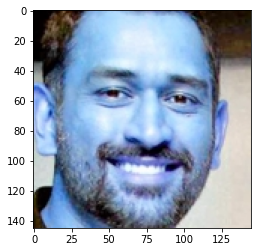

In [6]:
cropped_img = cv2.imread("./cropped_images/ms_dhoni/ms_dhoni1.png")
plt.imshow(cropped_img)

In [8]:
import pywt  

#wavelet transform
def w2d(cropped_img, mode='haar', level=1):
    imArray = cropped_img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

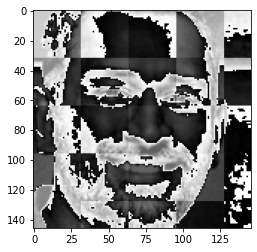

In [9]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [12]:

import os
path_to_cr_data = "./cropped_images/"
img_dirs = []
for entry in os.scandir(path_to_cr_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['./cropped_images/rohit_sharma',
 './cropped_images/ishant_sharma',
 './cropped_images/ms_dhoni',
 './cropped_images/virat_kholi',
 './cropped_images/hardik_pandya']

In [13]:
cricketer_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    cricketer_name = img_dir.split('/')[-1]
    cricketer_file_names_dict[cricketer_name] = []

In [14]:
cricketer_file_names_dict

{'rohit_sharma': [],
 'ishant_sharma': [],
 'ms_dhoni': [],
 'virat_kholi': [],
 'hardik_pandya': []}